<a href="https://colab.research.google.com/github/abhigyan2003/keystroke/blob/main/sequencedata_transformer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [2]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch

# Load both user files
df1 = pd.read_csv("User1.csv")
df2 = pd.read_csv("User2.csv")

df = pd.concat([df1, df2], ignore_index=True)

# Clean
df = df[df['EventType'].isin(['press', 'release'])].dropna(subset=['Key', 'Username'])
df = df.sort_values('Timestamp').reset_index(drop=True)

# Encode key values and usernames
key_encoder = LabelEncoder()
user_encoder = LabelEncoder()

df['KeyEncoded'] = key_encoder.fit_transform(df['Key'])
df['UserEncoded'] = user_encoder.fit_transform(df['Username'])

print(user_encoder.classes_)  # should print ['User1' 'User2']


['User1' 'User2']


In [3]:
# Load the dataset
file_path = r"/content/User1.csv"

df = pd.read_csv(file_path, encoding='latin1')  # Use 'latin1' to avoid encoding issues


df.head()


,Timestamp,EventType,Key,Username
0,"2017-03-20 01:24:55,555",RESTART,NaN,NaN
1,"2017-03-20 01:25:20,894",release,Key.alt_l,User1
2,"2017-03-20 01:25:20,910",release,Key.ctrl_l,User1
3,"2017-03-20 01:25:20,910",release,Key.shift,User1
4,"2017-03-20 01:25:20,910",release,Key.cmd,User1


In [4]:
# Check shape and columns
print(f"Shape: {df.shape}")
print("Columns:", df.columns.tolist())

# Rename if needed (depends on dataset)
# df = df.rename(columns={'v1': 'label', 'v2': 'text'})




Shape: (195036, 4)
Columns: ['Timestamp', 'EventType', 'Key', 'Username']


In [5]:
print("Columns in the dataset:")
print(df.columns.tolist())


df.head()


Columns in the dataset:
['Timestamp', 'EventType', 'Key', 'Username']


,Timestamp,EventType,Key,Username
0,"2017-03-20 01:24:55,555",RESTART,NaN,NaN
1,"2017-03-20 01:25:20,894",release,Key.alt_l,User1
2,"2017-03-20 01:25:20,910",release,Key.ctrl_l,User1
3,"2017-03-20 01:25:20,910",release,Key.shift,User1
4,"2017-03-20 01:25:20,910",release,Key.cmd,User1


In [6]:

print(df.info())

# Check unique event types (e.g., press, release, REFRESH)
print("\nUnique Event Types:")
print(df['EventType'].unique())

# Unique keys
print("\nUnique Keys:")
print(df['Key'].unique())

# Unique usernames
print("\nUnique Users:")
print(df['Username'].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195036 entries, 0 to 195035
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   Timestamp  195036 non-null  object
 1   EventType  195036 non-null  object
 2   Key        194326 non-null  object
 3   Username   194326 non-null  object
dtypes: object(4)
memory usage: 6.0+ MB
None

Unique Event Types:
['RESTART' 'release' 'press' 'REFRESH']

Unique Keys:
[nan 'Key.alt_l' 'Key.ctrl_l' 'Key.shift' 'Key.cmd' 'Key.alt_r'
 'Key.ctrl_r' 'Key.shift_r' 'Key.cmd_r' "u'LEFT'" "u'RIGHT'" "u'CENTER'"
 "u'None'" 'Key.backspace' 'Key.space' 'Key.enter' "u'DIGIT'" 'Key.tab'
 'Key.up' 'Key.down' 'Key.delete' 'Key.caps_lock' 'Key.right'
 'Key.num_lock' '<175>' '<174>' '<135>' 'Key.esc' '<47>' 'Key.f11'
 'Key.f12' 'Key.left' '<241>' '<234>' 'Key.f7']

Unique Users:
[nan 'User1']


In [7]:

if 'Key' in df.columns:
    unique_keys = df['Key'].dropna().unique()  # Drop NaNs (for rows like REFRESH)
    print(f"Total Unique Keys: {len(unique_keys)}")
    print("Unique Key Values:")
    for key in unique_keys:
        print(key)
else:
    print("'Key' column not found in the DataFrame.")


Total Unique Keys: 34
Unique Key Values:
Key.alt_l
Key.ctrl_l
Key.shift
Key.cmd
Key.alt_r
Key.ctrl_r
Key.shift_r
Key.cmd_r
u'LEFT'
u'RIGHT'
u'CENTER'
u'None'
Key.backspace
Key.space
Key.enter
u'DIGIT'
Key.tab
Key.up
Key.down
Key.delete
Key.caps_lock
Key.right
Key.num_lock
<175>
<174>
<135>
Key.esc
<47>
Key.f11
Key.f12
Key.left
<241>
<234>
Key.f7


<ipython-input-8-3336381617>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_keys.values, y=top_keys.index, palette='magma')


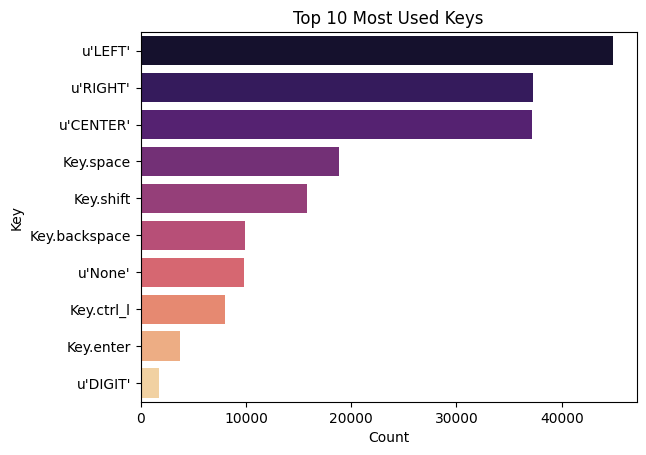

In [8]:
top_keys = df['Key'].value_counts().head(10)
sns.barplot(x=top_keys.values, y=top_keys.index, palette='magma')
plt.title("Top 10 Most Used Keys")
plt.xlabel("Count")
plt.ylabel("Key")
plt.show()


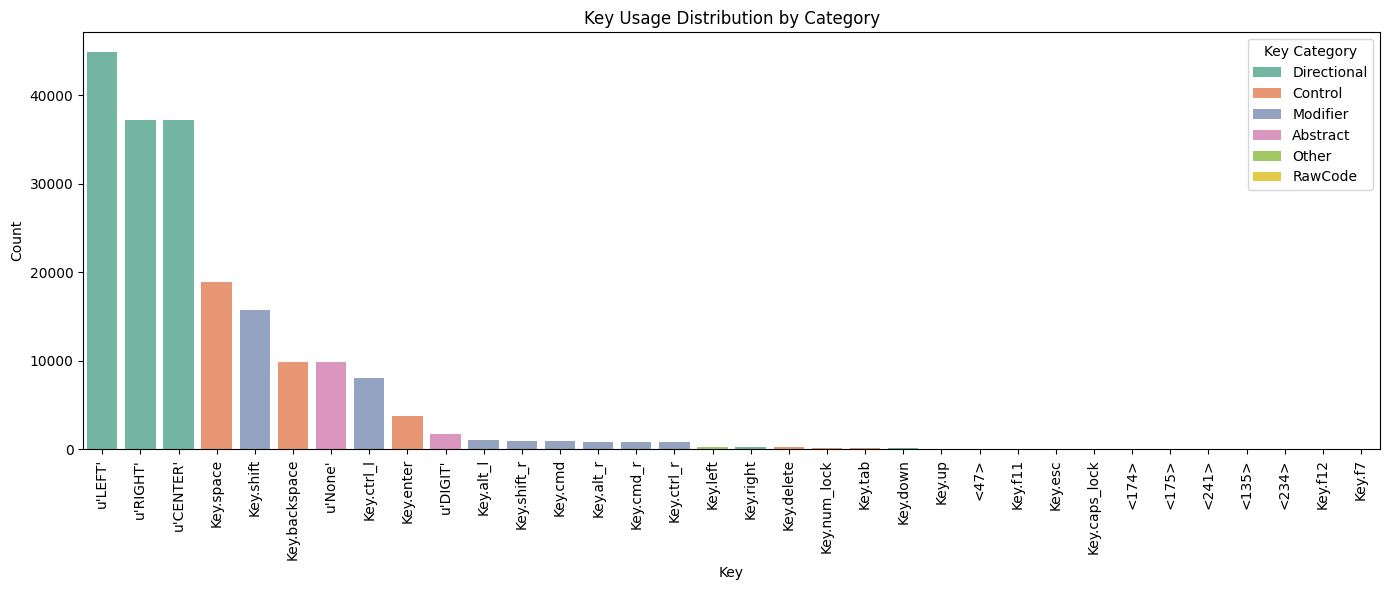

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Categorization map for all unique keys
key_categories = {
    # Modifier keys
    'Key.alt_l': 'Modifier', 'Key.ctrl_l': 'Modifier', 'Key.shift': 'Modifier',
    'Key.cmd': 'Modifier', 'Key.alt_r': 'Modifier', 'Key.ctrl_r': 'Modifier',
    'Key.shift_r': 'Modifier', 'Key.cmd_r': 'Modifier',

    # Directional / positional keys
    "u'LEFT'": 'Directional', "u'RIGHT'": 'Directional', "u'CENTER'": 'Directional',
    'Key.up': 'Directional', 'Key.down': 'Directional', 'Key.right': 'Directional',

    # Control / action keys
    'Key.backspace': 'Control', 'Key.space': 'Control', 'Key.enter': 'Control',
    'Key.tab': 'Control', 'Key.delete': 'Control', 'Key.esc': 'Control',
    'Key.caps_lock': 'Control', 'Key.num_lock': 'Control', 'Key.f11': 'Control',

    # Abstract / placeholder
    "u'DIGIT'": 'Abstract', "u'None'": 'Abstract',

    # Raw key codes
    '<175>': 'RawCode', '<174>': 'RawCode', '<135>': 'RawCode', '<47>': 'RawCode'
}

# Count key frequencies
key_counts = df['Key'].value_counts().dropna()

# Assign categories to each key based on mapping
category_data = []
for key, count in key_counts.items():
    category = key_categories.get(key, 'Other')
    category_data.append({'Key': key, 'Count': count, 'Category': category})

# Create DataFrame from categorized keys
key_df = pd.DataFrame(category_data)

# Plot using seaborn
plt.figure(figsize=(14, 6))
sns.barplot(data=key_df, x='Key', y='Count', hue='Category', dodge=False, palette='Set2')
plt.title("Key Usage Distribution by Category")
plt.xlabel("Key")
plt.ylabel("Count")
plt.xticks(rotation=90)
plt.legend(title="Key Category")
plt.tight_layout()
plt.show()


In [10]:
!pip install torch numpy pandas scikit-learn

In [14]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import torch

# Load both user files
df1 = pd.read_csv("User1.csv")
df2 = pd.read_csv("User2.csv")

df = pd.concat([df1, df2], ignore_index=True)

# Clean
df = df[df['EventType'].isin(['press', 'release'])].dropna(subset=['Key', 'Username'])
df = df.sort_values('Timestamp').reset_index(drop=True)

# Encode key values and usernames
key_encoder = LabelEncoder()
user_encoder = LabelEncoder()

df['KeyEncoded'] = key_encoder.fit_transform(df['Key'])
df['UserEncoded'] = user_encoder.fit_transform(df['Username'])

print(user_encoder.classes_)  # should print ['User1' 'User2']


['User1' 'User2']


In [15]:
SEQ_LEN = 20
X, y = [], []

for i in range(len(df) - SEQ_LEN):
    keys = df['KeyEncoded'].iloc[i:i+SEQ_LEN].tolist()
    users = df['UserEncoded'].iloc[i:i+SEQ_LEN]
    if len(set(users)) == 1:  # one user per sequence
        X.append(keys)
        y.append(users.iloc[0])

X = torch.tensor(X, dtype=torch.long)
y = torch.tensor(y, dtype=torch.long)

print(f"Dataset shape: {X.shape}, Labels: {y.unique()}")


Dataset shape: torch.Size([240736, 20]), Labels: tensor([0, 1])


In [16]:
import torch.nn as nn
import math

class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len=512):
        super().__init__()
        pe = torch.zeros(max_len, d_model)
        pos = torch.arange(0, max_len).unsqueeze(1)
        div = torch.exp(torch.arange(0, d_model, 2) * -math.log(10000.0) / d_model)
        pe[:, 0::2] = torch.sin(pos * div)
        pe[:, 1::2] = torch.cos(pos * div)
        self.register_buffer('pe', pe.unsqueeze(0))

    def forward(self, x):
        return x + self.pe[:, :x.size(1)]


In [17]:
class MultiHeadAttention(nn.Module):
    def __init__(self, d_model, num_heads):
        super().__init__()
        assert d_model % num_heads == 0
        self.d_model = d_model
        self.num_heads = num_heads
        self.d_k = d_model // num_heads

        self.q_linear = nn.Linear(d_model, d_model)
        self.k_linear = nn.Linear(d_model, d_model)
        self.v_linear = nn.Linear(d_model, d_model)
        self.out_proj = nn.Linear(d_model, d_model)

    def forward(self, x):
        B, T, D = x.shape
        H = self.num_heads

        Q = self.q_linear(x).view(B, T, H, self.d_k).transpose(1, 2)  # (B, H, T, d_k)
        K = self.k_linear(x).view(B, T, H, self.d_k).transpose(1, 2)
        V = self.v_linear(x).view(B, T, H, self.d_k).transpose(1, 2)

        scores = Q @ K.transpose(-2, -1) / math.sqrt(self.d_k)  # (B, H, T, T)
        weights = torch.softmax(scores, dim=-1)
        out = weights @ V  # (B, H, T, d_k)

        out = out.transpose(1, 2).contiguous().view(B, T, D)
        return self.out_proj(out)


In [18]:
class TransformerEncoderBlock(nn.Module):
    def __init__(self, d_model, num_heads, ff_dim=128, dropout=0.1):
        super().__init__()
        self.attn = MultiHeadAttention(d_model, num_heads)
        self.norm1 = nn.LayerNorm(d_model)
        self.ff = nn.Sequential(
            nn.Linear(d_model, ff_dim),
            nn.ReLU(),
            nn.Linear(ff_dim, d_model)
        )
        self.norm2 = nn.LayerNorm(d_model)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        attn_out = self.attn(x)
        x = self.norm1(x + self.dropout(attn_out))
        ff_out = self.ff(x)
        x = self.norm2(x + self.dropout(ff_out))
        return x


In [19]:
class KeystrokeClassifier(nn.Module):
    def __init__(self, vocab_size, num_classes, d_model=64, num_heads=4, num_layers=2):
        super().__init__()
        self.embed = nn.Embedding(vocab_size, d_model)
        self.pos_enc = PositionalEncoding(d_model)
        self.encoder_layers = nn.ModuleList([
            TransformerEncoderBlock(d_model, num_heads) for _ in range(num_layers)
        ])
        self.classifier = nn.Linear(d_model, num_classes)

    def forward(self, x):
        x = self.embed(x)
        x = self.pos_enc(x)
        for layer in self.encoder_layers:
            x = layer(x)
        x = x.mean(dim=1)  # Global mean pooling
        return self.classifier(x)


In [20]:
from torch.utils.data import TensorDataset, DataLoader, random_split

dataset = TensorDataset(X, y)
train_size = int(0.8 * len(dataset))
train_ds, val_ds = random_split(dataset, [train_size, len(dataset) - train_size])
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32)

model = KeystrokeClassifier(vocab_size=len(key_encoder.classes_), num_classes=2)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [21]:
def train(model, train_dl, val_dl, epochs=5):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for xb, yb in train_dl:
            preds = model(xb)
            loss = loss_fn(preds, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for xb, yb in val_dl:
                preds = model(xb)
                correct += (preds.argmax(dim=1) == yb).sum().item()
                total += yb.size(0)

        acc = correct / total
        print(f"Epoch {epoch+1} | Loss: {total_loss:.4f} | Val Acc: {acc:.2%}")

train(model, train_dl, val_dl, epochs=10)


Epoch 1 | Loss: 2203.0565 | Val Acc: 84.95%
Epoch 2 | Loss: 2114.8520 | Val Acc: 84.87%
Epoch 3 | Loss: 2087.3668 | Val Acc: 85.04%
Epoch 4 | Loss: 2069.5474 | Val Acc: 85.34%
Epoch 5 | Loss: 2055.9640 | Val Acc: 85.30%
Epoch 6 | Loss: 2046.6289 | Val Acc: 85.30%
Epoch 7 | Loss: 2056.6343 | Val Acc: 85.22%
Epoch 8 | Loss: 2057.4137 | Val Acc: 85.30%
Epoch 9 | Loss: 2052.1441 | Val Acc: 85.30%
Epoch 10 | Loss: 2042.4523 | Val Acc: 85.42%


In [22]:
from sklearn.metrics import classification_report

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in val_dl:
        out = model(xb)
        preds = torch.argmax(out, dim=1)
        y_true.extend(yb.tolist())
        y_pred.extend(preds.tolist())

print(classification_report(y_true, y_pred, target_names=user_encoder.classes_))


              precision    recall  f1-score   support

       User1       0.84      0.99      0.91     36373
       User2       0.96      0.42      0.59     11775

    accuracy                           0.85     48148
   macro avg       0.90      0.71      0.75     48148
weighted avg       0.87      0.85      0.83     48148



In [23]:
import numpy as np
unique, counts = np.unique(y.numpy(), return_counts=True)
for label, count in zip(user_encoder.inverse_transform(unique), counts):
    print(f"{label}: {count} samples")


User1: 181347 samples
User2: 59389 samples


In [24]:
181347+59389

240736

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Switch model to evaluation mode
model.eval()

# Collect true and predicted labels
y_true, y_pred = [], []

with torch.no_grad():
    for xb, yb in val_dl:
        logits = model(xb)
        preds = torch.argmax(logits, dim=1)
        y_true.extend(yb.tolist())
        y_pred.extend(preds.tolist())

print(len(y_true))


48148


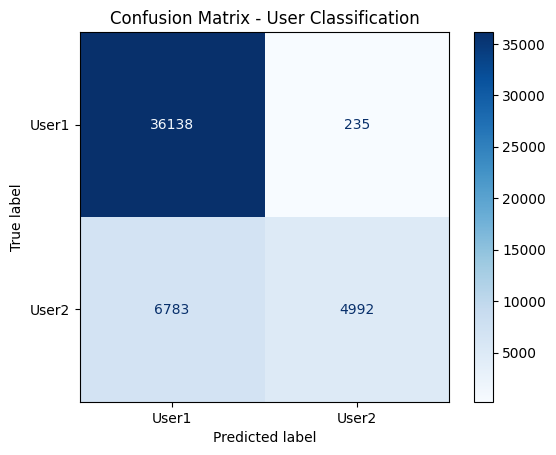

In [26]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=user_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - User Classification")
plt.show()


In [27]:
print(model)

KeystrokeClassifier(
  (embed): Embedding(36, 64)
  (pos_enc): PositionalEncoding()
  (encoder_layers): ModuleList(
    (0-1): 2 x TransformerEncoderBlock(
      (attn): MultiHeadAttention(
        (q_linear): Linear(in_features=64, out_features=64, bias=True)
        (k_linear): Linear(in_features=64, out_features=64, bias=True)
        (v_linear): Linear(in_features=64, out_features=64, bias=True)
        (out_proj): Linear(in_features=64, out_features=64, bias=True)
      )
      (norm1): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (ff): Sequential(
        (0): Linear(in_features=64, out_features=128, bias=True)
        (1): ReLU()
        (2): Linear(in_features=128, out_features=64, bias=True)
      )
      (norm2): LayerNorm((64,), eps=1e-05, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
  )
  (classifier): Linear(in_features=64, out_features=2, bias=True)
)


In [40]:
!pip install torchinfo


In [32]:
print("First 5 sequences and labels in full dataset:")
for i in range(5):
    print("X:", X[i].tolist(), "→ y:", y[i].item())


First 5 sequences and labels in full dataset:
X: [6, 12, 26, 10, 7, 13, 27, 11, 6, 12, 26, 10, 11, 7, 13, 27, 33, 33, 35, 35] → y: 0
X: [12, 26, 10, 7, 13, 27, 11, 6, 12, 26, 10, 11, 7, 13, 27, 33, 33, 35, 35, 33] → y: 0
X: [26, 10, 7, 13, 27, 11, 6, 12, 26, 10, 11, 7, 13, 27, 33, 33, 35, 35, 33, 33] → y: 0
X: [10, 7, 13, 27, 11, 6, 12, 26, 10, 11, 7, 13, 27, 33, 33, 35, 35, 33, 33, 6] → y: 0
X: [7, 13, 27, 11, 6, 12, 26, 10, 11, 7, 13, 27, 33, 33, 35, 35, 33, 33, 6, 12] → y: 0


In [33]:
print("First 5 samples in train_ds:")
for i in range(5):
    print(train_ds[i])


First 5 samples in train_ds:
(tensor([26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 26, 35, 35,
        26, 35]), tensor(0))
(tensor([28, 31, 31, 31, 31, 33, 33, 28, 28, 33, 35, 33, 35, 31, 31, 35, 35, 33,
        33, 31]), tensor(0))
(tensor([34,  8,  8, 19, 19, 26, 31, 31, 26, 35, 35,  8,  8,  8,  8, 12, 34, 34,
        12, 26]), tensor(0))
(tensor([31, 31, 31, 31, 33, 33, 28, 28, 35, 35, 31, 31, 33, 33, 28, 28, 35, 35,
        33, 33]), tensor(0))
(tensor([33, 31, 31, 33, 33, 35, 35,  8,  8,  8,  8, 35, 31, 35, 31, 33, 33, 33,
        33, 34]), tensor(0))


In [41]:
from torchinfo import summary

model = KeystrokeClassifier(vocab_size, num_classes)
summary(model, input_size=(1, sequence_length), dtypes=[torch.long])


Layer (type:depth-idx)                   Output Shape              Param #
KeystrokeClassifier                      [1, 2]                    --
├─Embedding: 1-1                         [1, 20, 64]               2,304
├─PositionalEncoding: 1-2                [1, 20, 64]               --
├─ModuleList: 1-3                        --                        --
│    └─TransformerEncoderBlock: 2-1      [1, 20, 64]               --
│    │    └─MultiHeadAttention: 3-1      [1, 20, 64]               16,640
│    │    └─Dropout: 3-2                 [1, 20, 64]               --
│    │    └─LayerNorm: 3-3               [1, 20, 64]               128
│    │    └─Sequential: 3-4              [1, 20, 64]               16,576
│    │    └─Dropout: 3-5                 [1, 20, 64]               --
│    │    └─LayerNorm: 3-6               [1, 20, 64]               128
│    └─TransformerEncoderBlock: 2-2      [1, 20, 64]               --
│    │    └─MultiHeadAttention: 3-7      [1, 20, 64]               16,64

In [43]:
from torch.utils.data import TensorDataset, DataLoader, random_split

dataset = TensorDataset(X, y)
train_size = int(0.8 * len(dataset))

train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)
val_dl = DataLoader(val_ds, batch_size=32)
# Sequential split — no shuffling
train_ds = torch.utils.data.Subset(dataset, list(range(train_size)))
val_ds = torch.utils.data.Subset(dataset, list(range(train_size, len(dataset))))


model = KeystrokeClassifier(vocab_size=len(key_encoder.classes_), num_classes=2)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)


In [44]:
def train(model, train_dl, val_dl, epochs=5):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for xb, yb in train_dl:
            preds = model(xb)
            loss = loss_fn(preds, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for xb, yb in val_dl:
                preds = model(xb)
                correct += (preds.argmax(dim=1) == yb).sum().item()
                total += yb.size(0)

        acc = correct / total
        print(f"Epoch {epoch+1} | Loss: {total_loss:.4f} | Val Acc: {acc:.2%}")

train(model, train_dl, val_dl, epochs=10)


Epoch 1 | Loss: 2145.5614 | Val Acc: 82.67%
Epoch 2 | Loss: 2048.2398 | Val Acc: 82.78%
Epoch 3 | Loss: 2019.4885 | Val Acc: 82.44%
Epoch 4 | Loss: 1990.1675 | Val Acc: 83.02%
Epoch 5 | Loss: 1973.5229 | Val Acc: 82.66%
Epoch 6 | Loss: 1960.6325 | Val Acc: 82.71%
Epoch 7 | Loss: 1947.7289 | Val Acc: 82.95%
Epoch 8 | Loss: 1935.1063 | Val Acc: 82.47%
Epoch 9 | Loss: 1917.3621 | Val Acc: 82.61%
Epoch 10 | Loss: 1900.6581 | Val Acc: 83.30%


In [45]:
from sklearn.metrics import classification_report

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in val_dl:
        out = model(xb)
        preds = torch.argmax(out, dim=1)
        y_true.extend(yb.tolist())
        y_pred.extend(preds.tolist())

print(classification_report(y_true, y_pred, target_names=user_encoder.classes_))


              precision    recall  f1-score   support

       User1       0.82      0.98      0.90     35161
       User2       0.90      0.43      0.58     12987

    accuracy                           0.83     48148
   macro avg       0.86      0.71      0.74     48148
weighted avg       0.84      0.83      0.81     48148



In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Switch model to evaluation mode
model.eval()

# Collect true and predicted labels
y_true, y_pred = [], []

with torch.no_grad():
    for xb, yb in val_dl:
        logits = model(xb)
        preds = torch.argmax(logits, dim=1)
        y_true.extend(yb.tolist())
        y_pred.extend(preds.tolist())

print(len(y_true))





48148


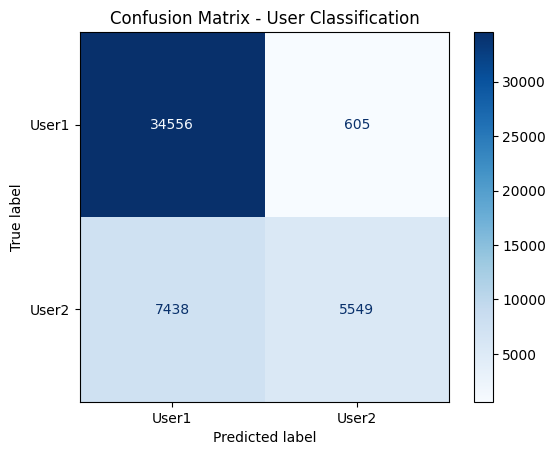

In [47]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=user_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - User Classification")
plt.show()


In [48]:
import random

# Find class indices
user1_indices = [i for i in range(len(y)) if y[i] == 0]  # Majority
user2_indices = [i for i in range(len(y)) if y[i] == 1]  # Minority

# Downsample User1 to match User2
random.shuffle(user1_indices)
user1_selected = user1_indices[:len(user2_indices)]

# Combine and shuffle final balanced indices
balanced_indices = user1_selected + user2_indices
balanced_indices.sort()  # Keep order for sequential splitting

# Balanced data
X_bal = X[balanced_indices]
y_bal = y[balanced_indices]


In [49]:
from torch.utils.data import TensorDataset, Subset, DataLoader

dataset = TensorDataset(X_bal, y_bal)

train_size = int(0.8 * len(dataset))
val_size = len(dataset) - train_size

# Sequential indices (no shuffling)
train_indices = list(range(train_size))
val_indices = list(range(train_size, len(dataset)))

# Use Subset to preserve sequence order
train_ds = Subset(dataset, train_indices)
val_ds = Subset(dataset, val_indices)


In [50]:
train_dl = DataLoader(train_ds, batch_size=32, shuffle=True)   # Shuffle batches
val_dl = DataLoader(val_ds, batch_size=32, shuffle=False)      # No shuffle for eval


In [51]:
from collections import Counter

def check_distribution(dl, name):
    all_labels = []
    for _, yb in dl:
        all_labels.extend(yb.tolist())
    dist = Counter(all_labels)
    print(f"{name} class distribution:", {user_encoder.inverse_transform([k])[0]: v for k, v in dist.items()})

print(f"Training Set Size: {len(train_ds)} | Validation Set Size: {len(val_ds)}")
check_distribution(train_dl, "Train")
check_distribution(val_dl, "Validation")


Training Set Size: 95022 | Validation Set Size: 23756
Train class distribution: {'User2': 46402, 'User1': 48620}
Validation class distribution: {'User1': 10769, 'User2': 12987}


In [80]:
def train(model, train_dl, val_dl, epochs=5):
    for epoch in range(epochs):
        model.train()
        total_loss = 0
        for xb, yb in train_dl:
            preds = model(xb)
            loss = loss_fn(preds, yb)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

        # Validation
        model.eval()
        correct = 0
        total = 0
        with torch.no_grad():
            for xb, yb in val_dl:
                preds = model(xb)
                correct += (preds.argmax(dim=1) == yb).sum().item()
                total += yb.size(0)

        acc = correct / total
        print(f"Epoch {epoch+1} | Loss: {total_loss:.4f} | Val Acc: {acc:.2%}")

train(model, train_dl, val_dl, epochs=10)


Epoch 1 | Loss: 1363.5824 | Val Acc: 72.35%
Epoch 2 | Loss: 1298.1177 | Val Acc: 75.06%
Epoch 3 | Loss: 1276.6623 | Val Acc: 75.19%
Epoch 4 | Loss: 1261.6572 | Val Acc: 75.08%
Epoch 5 | Loss: 1252.2082 | Val Acc: 75.20%
Epoch 6 | Loss: 1243.8018 | Val Acc: 76.17%
Epoch 7 | Loss: 1239.4307 | Val Acc: 75.72%
Epoch 8 | Loss: 1233.1011 | Val Acc: 73.74%
Epoch 9 | Loss: 1232.6441 | Val Acc: 76.61%
Epoch 10 | Loss: 1227.6600 | Val Acc: 73.47%


In [81]:
print(f"Total balanced samples: {len(X_bal)}")


Total balanced samples: 118778


In [82]:
from collections import Counter

# Count how many samples for each class
class_counts = Counter(y_bal.tolist())

# Print in readable format
for label, count in class_counts.items():
    user = user_encoder.inverse_transform([label])[0]
    print(f"{user}: {count} samples")


User1: 59389 samples
User2: 59389 samples


In [83]:
print(f"Train set size: {len(train_ds)}")
print(f"Validation set size: {len(val_ds)}")


Train set size: 95022
Validation set size: 23756


In [84]:
from collections import Counter

def print_class_distribution(dataset, name=""):
    labels = [label.item() for _, label in dataset]
    counts = Counter(labels)

    print(f"{name} class distribution:")
    for label, count in counts.items():
        user = user_encoder.inverse_transform([label])[0]
        print(f"  {user}: {count} samples")

# Run for both splits
print_class_distribution(train_ds, "Train")
print_class_distribution(val_ds, "Validation")


Train class distribution:
  User1: 48620 samples
  User2: 46402 samples
Validation class distribution:
  User1: 10769 samples
  User2: 12987 samples


In [85]:
from sklearn.metrics import classification_report

model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for xb, yb in val_dl:
        out = model(xb)
        preds = torch.argmax(out, dim=1)
        y_true.extend(yb.tolist())
        y_pred.extend(preds.tolist())

print(classification_report(y_true, y_pred, target_names=user_encoder.classes_))


              precision    recall  f1-score   support

       User1       0.67      0.81      0.73     10769
       User2       0.81      0.67      0.73     12987

    accuracy                           0.73     23756
   macro avg       0.74      0.74      0.73     23756
weighted avg       0.75      0.73      0.73     23756



In [86]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Switch model to evaluation mode
model.eval()

# Collect true and predicted labels
y_true, y_pred = [], []

with torch.no_grad():
    for xb, yb in val_dl:
        logits = model(xb)
        preds = torch.argmax(logits, dim=1)
        y_true.extend(yb.tolist())
        y_pred.extend(preds.tolist())

print(len(y_true))





23756


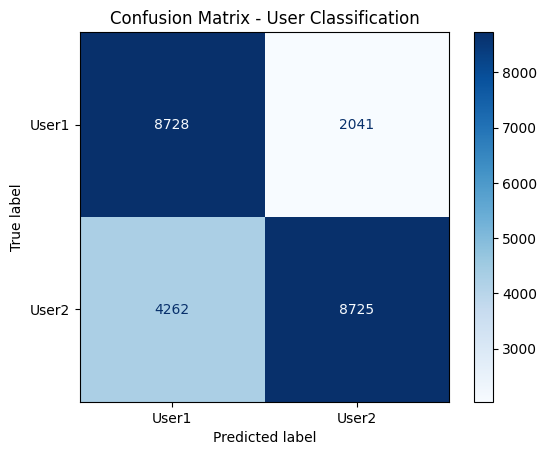

In [87]:
import matplotlib.pyplot as plt

cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=user_encoder.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix - User Classification")
plt.show()


In [88]:
import random

# Pick 5 samples from each class
print("Testing on random User1 sequences:")
for i in random.sample([i for i in range(len(y_bal)) if y_bal[i] == 0], 5):
    predicted = predict_user(model, X_bal[i].tolist(), user_encoder)
    print(f"True: User1 → Predicted: {predicted}")

print("\nTesting on random User2 sequences:")
for i in random.sample([i for i in range(len(y_bal)) if y_bal[i] == 1], 5):
    predicted = predict_user(model, X_bal[i].tolist(), user_encoder)
    print(f"True: User2 → Predicted: {predicted}")


Testing on random User1 sequences:
True: User1 → Predicted: User1
True: User1 → Predicted: User1
True: User1 → Predicted: User2
True: User1 → Predicted: User1
True: User1 → Predicted: User1

Testing on random User2 sequences:
True: User2 → Predicted: User2
True: User2 → Predicted: User2
True: User2 → Predicted: User2
True: User2 → Predicted: User2
True: User2 → Predicted: User2


In [89]:
from sklearn.metrics import classification_report
import pandas as pd

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for xb, yb in val_dl:
        logits = model(xb)
        preds = torch.argmax(logits, dim=1)
        y_true.extend(yb.tolist())
        y_pred.extend(preds.tolist())

# Get classification report as dict
report = classification_report(
    y_true, y_pred, target_names=user_encoder.classes_, output_dict=True
)

# Convert to DataFrame for easy plotting
report_df = pd.DataFrame(report).transpose()


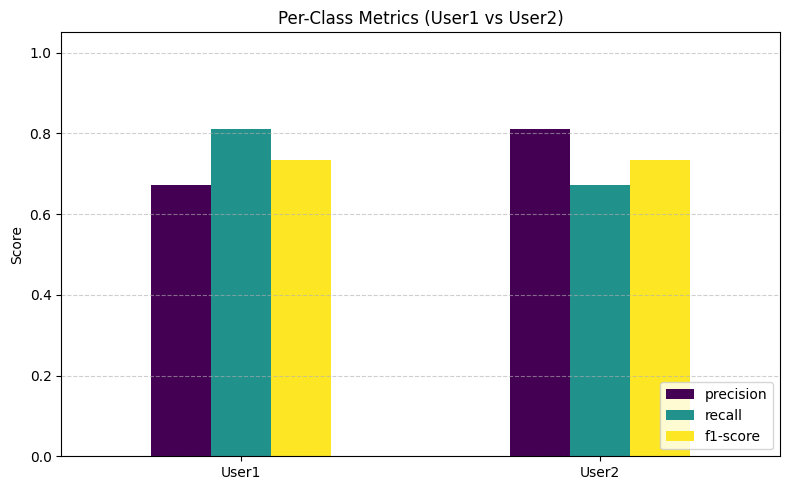

In [90]:
import matplotlib.pyplot as plt

# Select only User1 and User2 rows
user_metrics = report_df.loc[["User1", "User2"], ["precision", "recall", "f1-score"]]

# Plot
user_metrics.plot(kind='bar', figsize=(8, 5), colormap='viridis')
plt.title("Per-Class Metrics (User1 vs User2)")
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.legend(loc='lower right')
plt.tight_layout()
plt.show()
